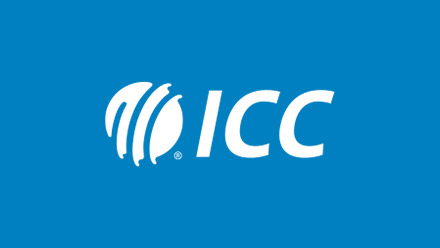

#  ICC Men's One Day Internationals (ODI) Analysis

### Batting Records Data Cleaning

In [1]:
# importing necessary libraries for data cleaning
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('ODI_batting_record.csv')

In [3]:
# Reviewing the data
df.head(5)

,name,span,matches,innings,not_outs,runs,highest_score,average,balls_faced,strike_rate,century,half_century,ducks
0,SR Tendulkar (IND),1990-2012,462,451,41,18426,200*,44.94,21366,86.23,49,96,19
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,V Kohli (IND),2008-2023,292,280,44,13848,183,58.67,14797,93.58,50,72,16
3,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
4,ST Jayasuriya (Asia/SL),1990-2011,442,430,18,13390,189,32.50,14664,91.31,28,68,34


In [4]:
df.shape

(2513, 13)

In [5]:
# Checking for any null values or any missing data
df.isnull().sum()

name             0
span             0
matches          0
innings          0
not_outs         0
runs             0
highest_score    0
average          0
balls_faced      0
strike_rate      0
century          0
half_century     0
ducks            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2513 non-null   object
 1   span           2513 non-null   object
 2   matches        2513 non-null   int64 
 3   innings        2513 non-null   object
 4   not_outs       2513 non-null   object
 5   runs           2513 non-null   object
 6   highest_score  2513 non-null   object
 7   average        2513 non-null   object
 8   balls_faced    2513 non-null   object
 9   strike_rate    2513 non-null   object
 10  century        2513 non-null   object
 11  half_century   2513 non-null   object
 12  ducks          2513 non-null   object
dtypes: int64(1), object(12)
memory usage: 255.4+ KB


In [7]:
# splitting the name such that we have two columns - name and country
df['country'] = df['name'].str.rsplit(' ',n=1).str.get(1)
df['name'] = df['name'].str.rsplit(' ',n=1).str.get(0) 

In [8]:
df.head(5)

,name,span,matches,innings,not_outs,runs,highest_score,average,balls_faced,strike_rate,century,half_century,ducks,country
0,SR Tendulkar,1990-2012,462,451,41,18426,200*,44.94,21366,86.23,49,96,19,(IND)
1,KC Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,(Asia/ICC/SL)
2,V Kohli,2008-2023,292,280,44,13848,183,58.67,14797,93.58,50,72,16,(IND)
3,RT Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,(AUS/ICC)
4,ST Jayasuriya,1990-2011,442,430,18,13390,189,32.50,14664,91.31,28,68,34,(Asia/SL)


In [9]:
# Reviewing the country column
df.country

0               (IND)
1       (Asia/ICC/SL)
2               (IND)
3           (AUS/ICC)
4           (Asia/SL)
            ...      
2508             (SL)
2509            (IRE)
2510            (AFG)
2511            (BAN)
2512            (PAK)
Name: country, Length: 2513, dtype: object

In [10]:
# Extracting all the text from the paranthesis
df['country'] = df['country'].str.extract(r'\((.*?)\)')

In [11]:
# Creating a list such that every entry separated by '/' is available
a = df['country'].str.split('/')

In [12]:
b = []
for i in a:
    
    if i[-1] != "ICC":  # checking if the last element is not ICC
        b.append(i[-1])
    else:               # the first element is important
         b.append(i[0])

In [13]:
# Converting the list to series
b = pd.Series(b)

In [14]:
# Modifying the country column
df['country']=b

In [15]:
df.head(5)

,name,span,matches,innings,not_outs,runs,highest_score,average,balls_faced,strike_rate,century,half_century,ducks,country
0,SR Tendulkar,1990-2012,462,451,41,18426,200*,44.94,21366,86.23,49,96,19,IND
1,KC Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,SL
2,V Kohli,2008-2023,292,280,44,13848,183,58.67,14797,93.58,50,72,16,IND
3,RT Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,AUS
4,ST Jayasuriya,1990-2011,442,430,18,13390,189,32.50,14664,91.31,28,68,34,SL


In [16]:
# necessary columns to be numeric
num_col = ['matches','innings','not_outs','runs','highest_score','average','balls_faced','strike_rate','century','half_century','ducks']

In [17]:
# making a copy of dataframe for the cleaning purpose
df2 = df[num_col]

In [18]:
# checkimg the innings column
df2.innings.unique()

array(['451', '380', '280', '365', '430', '418', '350', '314', '300',
       '318', '297', '254', '294', '289', '303', '273', '279', '218',
       '251', '238', '278', '220', '259', '230', '240', '245', '178',
       '369', '269', '223', '253', '234', '258', '231', '195', '255',
       '217', '194', '159', '196', '157', '185', '164', '208', '155',
       '203', '216', '214', '160', '228', '169', '114', '154', '175',
       '136', '142', '174', '202', '179', '182', '143', '184', '119',
       '149', '181', '161', '151', '193', '183', '221', '156', '125',
       '213', '145', '198', '122', '110', '126', '134', '127', '98',
       '133', '118', '107', '100', '141', '137', '152', '205', '81',
       '108', '99', '130', '95', '115', '111', '138', '92', '106', '87',
       '71', '117', '101', '85', '86', '79', '102', '109', '113', '70',
       '65', '72', '132', '84', '78', '77', '90', '88', '97', '116', '67',
       '62', '54', '56', '112', '82', '83', '91', '69', '44', '187', '60',
       

In [19]:
# '-' element cannot be converted into the numeric format, removing all the rows with '-' 
df3 = pd.DataFrame()
for i in df2.columns:
    df3[i]=df2[df2[i]!='-'][i]

In [20]:
# after copying the temporary dataframe some values tend to be missing and we are eliminating those rows
df2 = df3
df2.dropna(inplace=True)

In [21]:
# copying the changes in the original dataframe
df[num_col]=df2

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           2513 non-null   object 
 1   span           2513 non-null   object 
 2   matches        2311 non-null   float64
 3   innings        2311 non-null   object 
 4   not_outs       2311 non-null   object 
 5   runs           2311 non-null   object 
 6   highest_score  2311 non-null   object 
 7   average        2311 non-null   object 
 8   balls_faced    2311 non-null   object 
 9   strike_rate    2311 non-null   object 
 10  century        2311 non-null   object 
 11  half_century   2311 non-null   object 
 12  ducks          2311 non-null   object 
 13  country        2513 non-null   object 
dtypes: float64(1), object(13)
memory usage: 275.0+ KB


In [23]:
df.isnull().sum()

name               0
span               0
matches          202
innings          202
not_outs         202
runs             202
highest_score    202
average          202
balls_faced      202
strike_rate      202
century          202
half_century     202
ducks            202
country            0
dtype: int64

In [24]:
df.dropna(inplace=True)

In [25]:
df.innings.unique()

array(['451', '380', '280', '365', '430', '418', '350', '314', '300',
       '318', '297', '254', '294', '289', '303', '273', '279', '218',
       '251', '238', '278', '220', '259', '230', '240', '245', '178',
       '369', '269', '223', '253', '234', '258', '231', '195', '255',
       '217', '194', '159', '196', '157', '185', '164', '208', '155',
       '203', '216', '214', '160', '228', '169', '114', '154', '175',
       '136', '142', '174', '202', '179', '182', '143', '184', '119',
       '149', '181', '161', '151', '193', '183', '221', '156', '125',
       '213', '145', '198', '122', '110', '126', '134', '127', '98',
       '133', '118', '107', '100', '141', '137', '152', '205', '81',
       '108', '99', '130', '95', '115', '111', '138', '92', '106', '87',
       '71', '117', '101', '85', '86', '79', '102', '109', '113', '70',
       '65', '72', '132', '84', '78', '77', '90', '88', '97', '116', '67',
       '62', '54', '56', '112', '82', '83', '91', '69', '44', '187', '60',
       

In [26]:
# checking for highest_score column
df.highest_score.unique()

array(['200*', '169', '183', '164', '189', '144', '137*', '139', '153',
       '183*', '264', '215', '161*', '141*', '172', '176', '150', '194',
       '181*', '132*', '173', '158', '219', '159', '175', '124', '134*',
       '130', '148', '143', '145', '237*', '153*', '145*', '141', '174*',
       '179', '108*', '188*', '178', '140*', '142*', '133*', '166', '121',
       '139*', '120*', '185*', '177', '178*', '116*', '131*', '112',
       '185', '109*', '128*', '119', '144*', '150*', '170', '96*', '156',
       '162*', '112*', '174', '115', '134', '117', '147*', '116', '102',
       '137', '180', '119*', '103', '201*', '122', '111', '126*', '114',
       '102*', '125*', '142', '103*', '104', '210*', '109', '105', '182',
       '136', '123', '107*', '130*', '108', '72*', '135', '86', '151',
       '110', '127', '117*', '79*', '127*', '87', '111*', '121*', '83',
       '101*', '177*', '160*', '161', '106', '99', '101', '171', '152',
       '89', '128', '131', '140', '100', '208', '99*', 

In [27]:
# removing the '*' from the hihgest_score
high_score = []
for i in df.highest_score:
    
        if(i[-1]=='*'):
            high_score.append(i[:-1])
        else: 
            high_score.append(i)

In [28]:
df['highest_score']=high_score

In [29]:
df.head()

,name,span,matches,innings,not_outs,runs,highest_score,average,balls_faced,strike_rate,century,half_century,ducks,country
0,SR Tendulkar,1990-2012,462.0,451,41,18426,200,44.94,21366,86.23,49,96,19,IND
1,KC Sangakkara,2000-2015,404.0,380,41,14234,169,41.98,18048,78.86,25,93,15,SL
2,V Kohli,2008-2023,292.0,280,44,13848,183,58.67,14797,93.58,50,72,16,IND
3,RT Ponting,1995-2012,375.0,365,39,13704,164,42.03,17046,80.39,30,82,20,AUS
4,ST Jayasuriya,1990-2011,442.0,430,18,13390,189,32.50,14664,91.31,28,68,34,SL


In [30]:
df4 = df[num_col]

In [31]:
# converting to numeric columns

df5 = pd.DataFrame()
for i in df4.columns:
    df5[i]=pd.to_numeric(df4[i])

In [32]:
df[num_col]=df5

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2311 entries, 0 to 2430
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           2311 non-null   object 
 1   span           2311 non-null   object 
 2   matches        2311 non-null   float64
 3   innings        2311 non-null   int64  
 4   not_outs       2311 non-null   int64  
 5   runs           2311 non-null   int64  
 6   highest_score  2311 non-null   int64  
 7   average        2311 non-null   float64
 8   balls_faced    2311 non-null   int64  
 9   strike_rate    2311 non-null   float64
 10  century        2311 non-null   int64  
 11  half_century   2311 non-null   int64  
 12  ducks          2311 non-null   int64  
 13  country        2311 non-null   object 
dtypes: float64(3), int64(8), object(3)
memory usage: 270.8+ KB


In [34]:
# exporting the cleaned data to csv format
df.to_csv('ODI_batting_records_clean.csv',index=False)

### Bowling Records Data Cleaning

In [35]:
df2 = pd.read_csv('ODI_bowling_record.csv')

In [36]:
# Reviewing the data
df2.head()

,name,span,matches,innings,overs,maiden_overs,runs_conceded,wickets,best_bowling_figure,average,economy_rate,bowling_strike_rate,four_wickets_haul,five_wickets_haul
0,M Muralidaran (Asia/ICC/SL),1993-2011,350,341,3135.1,198,12326,534,7/30,23.08,3.93,35.2,15,10
1,Waqar Younis (PAK),1990-2003,250,247,2039.2,134,9608,404,7/36,23.78,4.71,30.2,14,13
2,WPUJC Vaas (Asia/SL),1994-2008,322,320,2629.1,279,11014,400,8/19,27.53,4.18,39.4,9,4
3,Shahid Afridi (Asia/ICC/PAK),1996-2015,398,372,2945.0,76,13632,395,7/12,34.51,4.62,44.7,4,9
4,SM Pollock (Afr/ICC/SA),1996-2008,303,297,2618.4,313,9631,393,6/35,24.50,3.67,39.9,12,5


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 2513 non-null   object
 1   span                 2513 non-null   object
 2   matches              2513 non-null   int64 
 3   innings              2513 non-null   object
 4   overs                2513 non-null   object
 5   maiden_overs         2513 non-null   object
 6   runs_conceded        2513 non-null   object
 7   wickets              2513 non-null   object
 8   best_bowling_figure  2513 non-null   object
 9   average              2513 non-null   object
 10  economy_rate         2513 non-null   object
 11  bowling_strike_rate  2513 non-null   object
 12  four_wickets_haul    2513 non-null   object
 13  five_wickets_haul    2513 non-null   object
dtypes: int64(1), object(13)
memory usage: 275.0+ KB


In [38]:
# Checking for any null values or any missing data
df2.isnull().sum()

name                   0
span                   0
matches                0
innings                0
overs                  0
maiden_overs           0
runs_conceded          0
wickets                0
best_bowling_figure    0
average                0
economy_rate           0
bowling_strike_rate    0
four_wickets_haul      0
five_wickets_haul      0
dtype: int64

In [39]:
# splitting the name such that we have two columns - name and country
df2['country'] = df2['name'].str.rsplit(' ',n=1).str.get(1)
df2['name'] = df2['name'].str.rsplit(' ',n=1).str.get(0) 

In [40]:
df2['country'] = df2['country'].str.extract(r'\((.*?)\)')

In [41]:
# Creating a list such that every entry separated by '/' is available
a = df2['country'].str.split('/')

In [42]:
b = []
for i in a:
    
    if i[-1] != "ICC":  # checking if the last element is not ICC
        b.append(i[-1])
    else:               # the first element is important
         b.append(i[0])

In [43]:
# Modifying the country column
b = pd.Series(b)
df2['country']=b

In [44]:
df2.head()

,name,span,matches,innings,overs,maiden_overs,runs_conceded,wickets,best_bowling_figure,average,economy_rate,bowling_strike_rate,four_wickets_haul,five_wickets_haul,country
0,M Muralidaran,1993-2011,350,341,3135.1,198,12326,534,7/30,23.08,3.93,35.2,15,10,SL
1,Waqar Younis,1990-2003,250,247,2039.2,134,9608,404,7/36,23.78,4.71,30.2,14,13,PAK
2,WPUJC Vaas,1994-2008,322,320,2629.1,279,11014,400,8/19,27.53,4.18,39.4,9,4,SL
3,Shahid Afridi,1996-2015,398,372,2945.0,76,13632,395,7/12,34.51,4.62,44.7,4,9,PAK
4,SM Pollock,1996-2008,303,297,2618.4,313,9631,393,6/35,24.50,3.67,39.9,12,5,SA


In [45]:
df2.country.value_counts()

country
IND      203
PAK      193
WI       187
ENG      185
SL       173
NZ       167
AUS      161
SA       148
ZIM      147
BAN      141
UAE      110
CAN       88
NED       85
SCOT      81
IRE       68
AFG       61
KENYA     50
NEP       41
NAM       40
HKG       40
USA       39
BER       37
PNG       29
OMA       25
JER       14
Name: count, dtype: int64

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 2513 non-null   object
 1   span                 2513 non-null   object
 2   matches              2513 non-null   int64 
 3   innings              2513 non-null   object
 4   overs                2513 non-null   object
 5   maiden_overs         2513 non-null   object
 6   runs_conceded        2513 non-null   object
 7   wickets              2513 non-null   object
 8   best_bowling_figure  2513 non-null   object
 9   average              2513 non-null   object
 10  economy_rate         2513 non-null   object
 11  bowling_strike_rate  2513 non-null   object
 12  four_wickets_haul    2513 non-null   object
 13  five_wickets_haul    2513 non-null   object
 14  country              2513 non-null   object
dtypes: int64(1), object(14)
memory usage: 294.6+ KB


In [47]:
df2.innings.unique()

array(['341', '247', '320', '372', '297', '268', '248', '217', '220',
       '265', '368', '241', '227', '277', '191', '188', '165', '197',
       '283', '162', '254', '171', '169', '150', '185', '121', '156',
       '159', '189', '113', '152', '232', '186', '181', '129', '160',
       '124', '100', '164', '114', '141', '112', '98', '128', '157',
       '116', '104', '154', '118', '119', '99', '163', '199', '140',
       '103', '172', '134', '137', '120', '270', '84', '136', '88', '130',
       '80', '96', '177', '161', '85', '105', '87', '158', '107', '102',
       '93', '139', '69', '90', '95', '78', '153', '74', '50', '151',
       '67', '135', '76', '72', '92', '132', '204', '94', '73', '81',
       '52', '64', '71', '79', '59', '108', '146', '89', '45', '82', '60',
       '83', '62', '65', '63', '55', '125', '70', '53', '101', '97', '66',
       '51', '57', '42', '47', '75', '48', '54', '110', '56', '37', '40',
       '49', '46', '34', '38', '39', '43', '44', '58', '106', '36', '3

In [48]:
df2.innings.value_counts()

innings
-      631
1      240
2      185
3      142
4      101
      ... 
66       1
103      1
70       1
125      1
341      1
Name: count, Length: 174, dtype: int64

In [49]:
# necessary columns to be numeric
num_col = ['innings','overs','maiden_overs','runs_conceded','wickets','average','economy_rate','bowling_strike_rate','four_wickets_haul','five_wickets_haul']

In [50]:
# reviewing the inninigs column
df2.innings.unique()

array(['341', '247', '320', '372', '297', '268', '248', '217', '220',
       '265', '368', '241', '227', '277', '191', '188', '165', '197',
       '283', '162', '254', '171', '169', '150', '185', '121', '156',
       '159', '189', '113', '152', '232', '186', '181', '129', '160',
       '124', '100', '164', '114', '141', '112', '98', '128', '157',
       '116', '104', '154', '118', '119', '99', '163', '199', '140',
       '103', '172', '134', '137', '120', '270', '84', '136', '88', '130',
       '80', '96', '177', '161', '85', '105', '87', '158', '107', '102',
       '93', '139', '69', '90', '95', '78', '153', '74', '50', '151',
       '67', '135', '76', '72', '92', '132', '204', '94', '73', '81',
       '52', '64', '71', '79', '59', '108', '146', '89', '45', '82', '60',
       '83', '62', '65', '63', '55', '125', '70', '53', '101', '97', '66',
       '51', '57', '42', '47', '75', '48', '54', '110', '56', '37', '40',
       '49', '46', '34', '38', '39', '43', '44', '58', '106', '36', '3

In [51]:
# making a copy of dataframe for the cleaning purpose
df3 = df2[num_col]

In [52]:
# '-' element cannot be converted into the numeric format, removing all the rows with '-'    : there are 631 entries
df4 = pd.DataFrame()
for i in df3.columns:
    df4[i]=df3[df3[i]!='-'][i]

In [53]:
df3 = df4
df3.dropna(inplace=True)

In [54]:
# copying the changes in the original dataframe
df2[num_col]=df3

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 2513 non-null   object
 1   span                 2513 non-null   object
 2   matches              2513 non-null   int64 
 3   innings              1593 non-null   object
 4   overs                1593 non-null   object
 5   maiden_overs         1593 non-null   object
 6   runs_conceded        1593 non-null   object
 7   wickets              1593 non-null   object
 8   best_bowling_figure  2513 non-null   object
 9   average              1593 non-null   object
 10  economy_rate         1593 non-null   object
 11  bowling_strike_rate  1593 non-null   object
 12  four_wickets_haul    1593 non-null   object
 13  five_wickets_haul    1593 non-null   object
 14  country              2513 non-null   object
dtypes: int64(1), object(14)
memory usage: 294.6+ KB


In [56]:
df2.dropna(inplace=True)

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1593 entries, 0 to 1592
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 1593 non-null   object
 1   span                 1593 non-null   object
 2   matches              1593 non-null   int64 
 3   innings              1593 non-null   object
 4   overs                1593 non-null   object
 5   maiden_overs         1593 non-null   object
 6   runs_conceded        1593 non-null   object
 7   wickets              1593 non-null   object
 8   best_bowling_figure  1593 non-null   object
 9   average              1593 non-null   object
 10  economy_rate         1593 non-null   object
 11  bowling_strike_rate  1593 non-null   object
 12  four_wickets_haul    1593 non-null   object
 13  five_wickets_haul    1593 non-null   object
 14  country              1593 non-null   object
dtypes: int64(1), object(14)
memory usage: 199.1+ KB


In [58]:
df4 = df2[num_col]

# converting to numeric columns
df5 = pd.DataFrame()
for i in df4.columns:
    df5[i]=pd.to_numeric(df4[i])

df2[num_col]= df5

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1593 entries, 0 to 1592
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1593 non-null   object 
 1   span                 1593 non-null   object 
 2   matches              1593 non-null   int64  
 3   innings              1593 non-null   int64  
 4   overs                1593 non-null   float64
 5   maiden_overs         1593 non-null   int64  
 6   runs_conceded        1593 non-null   int64  
 7   wickets              1593 non-null   int64  
 8   best_bowling_figure  1593 non-null   object 
 9   average              1593 non-null   float64
 10  economy_rate         1593 non-null   float64
 11  bowling_strike_rate  1593 non-null   float64
 12  four_wickets_haul    1593 non-null   int64  
 13  five_wickets_haul    1593 non-null   int64  
 14  country              1593 non-null   object 
dtypes: float64(4), int64(7), object(4)
memory u

In [60]:
# exporting the cleaned data to csv format
df2.to_csv('ODI_bowling_records_clean.csv',index=False)

## Data Analysis (01/01/1990-31/05/2024)

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df.head()

,name,span,matches,innings,not_outs,runs,highest_score,average,balls_faced,strike_rate,century,half_century,ducks,country
0,SR Tendulkar,1990-2012,462.0,451,41,18426,200,44.94,21366,86.23,49,96,19,IND
1,KC Sangakkara,2000-2015,404.0,380,41,14234,169,41.98,18048,78.86,25,93,15,SL
2,V Kohli,2008-2023,292.0,280,44,13848,183,58.67,14797,93.58,50,72,16,IND
3,RT Ponting,1995-2012,375.0,365,39,13704,164,42.03,17046,80.39,30,82,20,AUS
4,ST Jayasuriya,1990-2011,442.0,430,18,13390,189,32.50,14664,91.31,28,68,34,SL


In [63]:
runs = df[['name','runs']]

In [64]:
# Top 5 batsman having most runs
runs.sort_values(by='runs',ascending=False)['name'].head(5)

0     SR Tendulkar
1    KC Sangakkara
2          V Kohli
3       RT Ponting
4    ST Jayasuriya
Name: name, dtype: object

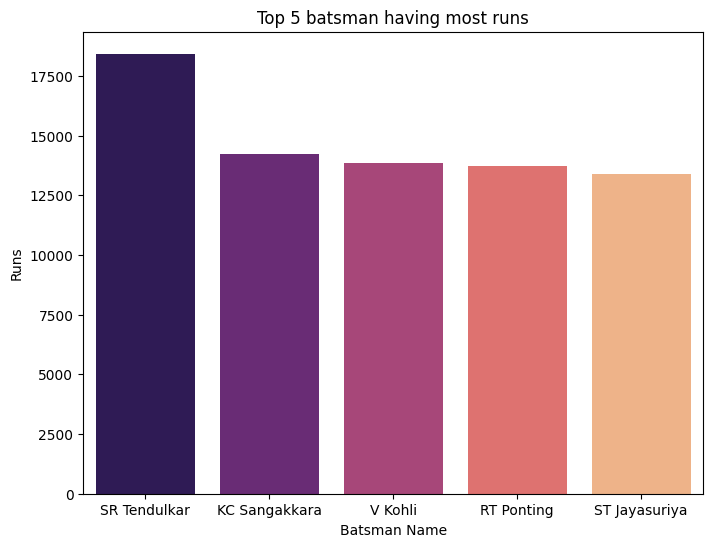

In [65]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='runs', data=runs.sort_values(by='runs',ascending=False).head(5), palette="magma")
plt.title('Top 5 batsman having most runs')
plt.xlabel('Batsman Name')
plt.ylabel('Runs')
plt.show()

In [66]:
# Top 20 batsman having played most number of matches
most_matches = df[df['runs']>8000].sort_values(by='matches',ascending=False).head(20)

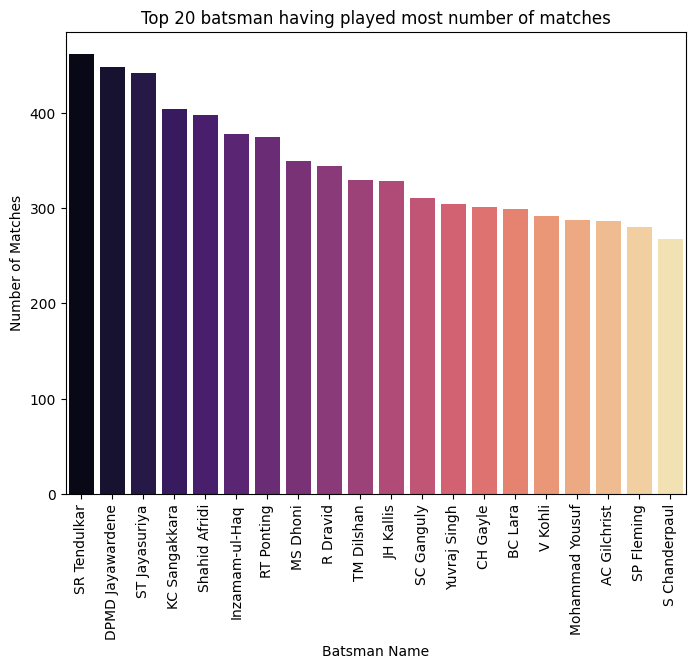

In [67]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='matches', data=most_matches, palette="magma")
plt.title('Top 20 batsman having played most number of matches')
plt.xlabel('Batsman Name')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

In [68]:
# Top 10 players with the best average having played atleast 200 matches
best_average = df[df['runs']>8000].sort_values(by='average',ascending=False).head(10)

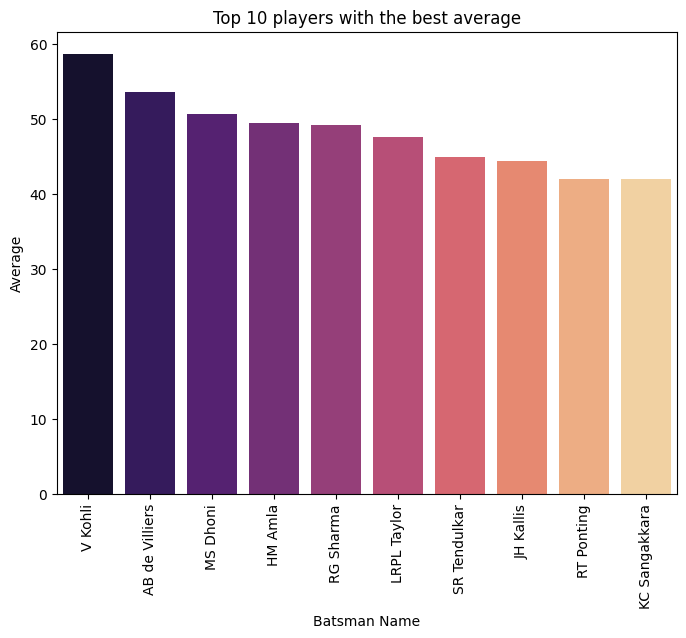

In [69]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='average', data=best_average, palette="magma")
plt.title('Top 10 players with the best average')
plt.xlabel('Batsman Name')
plt.ylabel('Average')
plt.xticks(rotation=90)
plt.show()

In [70]:
# Top 20 players with the best strike rate having played atleast 200 matches
best_strike = df[df['runs']>8000].sort_values(by='strike_rate',ascending=False).head(20)

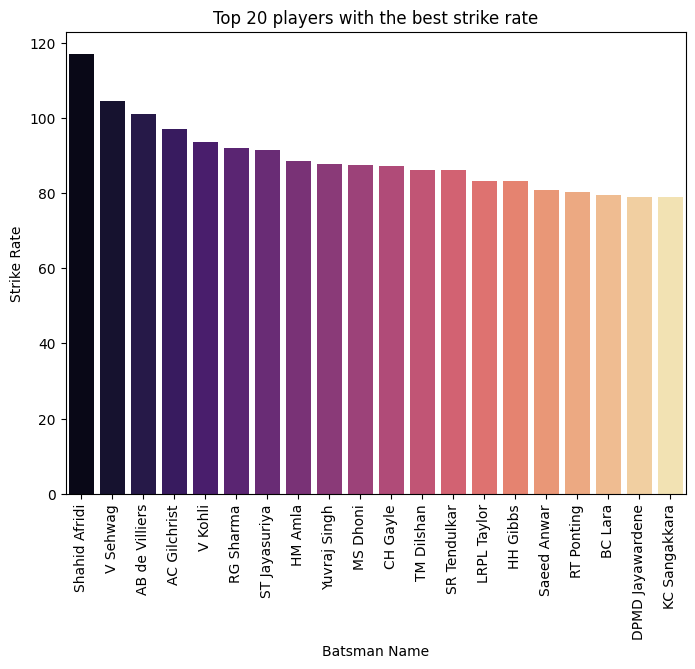

In [71]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='strike_rate', data=best_strike, palette="magma")
plt.title('Top 20 players with the best strike rate')
plt.xlabel('Batsman Name')
plt.ylabel('Strike Rate')
plt.xticks(rotation=90)
plt.show()

In [72]:
# Top 15 players with most number of centuries
most_century = df.sort_values(by='century',ascending=False).head(15)

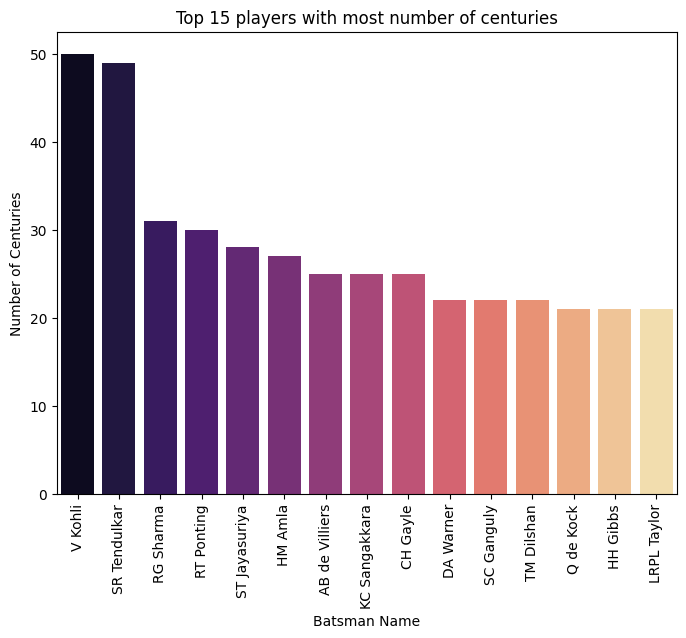

In [73]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='century', data = most_century, palette="magma")
plt.title('Top 15 players with most number of centuries')
plt.xlabel('Batsman Name')
plt.ylabel('Number of Centuries')
plt.xticks(rotation=90)
plt.show()

In [74]:
# Top 15 players with most number of half-centuries
half_century = df.sort_values(by='half_century',ascending=False).head(15)

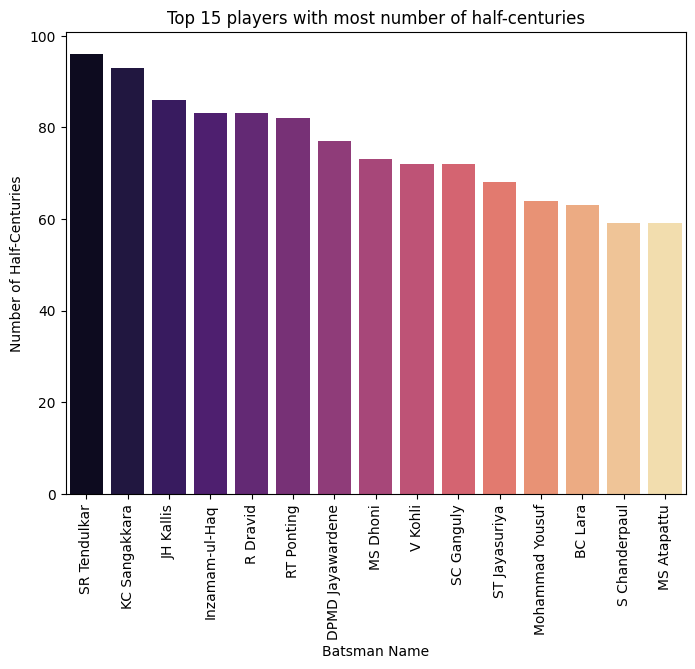

In [75]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='half_century', data = half_century, palette="magma")
plt.title('Top 15 players with most number of half-centuries')
plt.xlabel('Batsman Name')
plt.ylabel('Number of Half-Centuries')
plt.xticks(rotation=90)
plt.show()

In [76]:
# Top 15 players with most number of ducks
most_ducks = df[df['runs']>8000].sort_values(by='ducks',ascending=False).head(15)

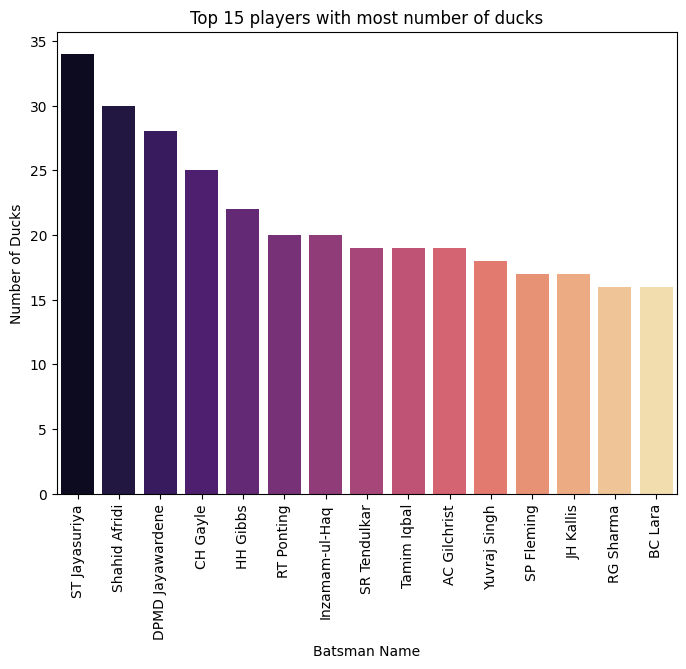

In [77]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='ducks', data = most_ducks, palette="magma")
plt.title('Top 15 players with most number of ducks')
plt.xlabel('Batsman Name')
plt.ylabel('Number of Ducks')
plt.xticks(rotation=90)
plt.show()

In [78]:
# Top 15 players with most number of not-outs
most_notouts = df[df['runs']>8000].sort_values(by='not_outs',ascending=False).head(15)

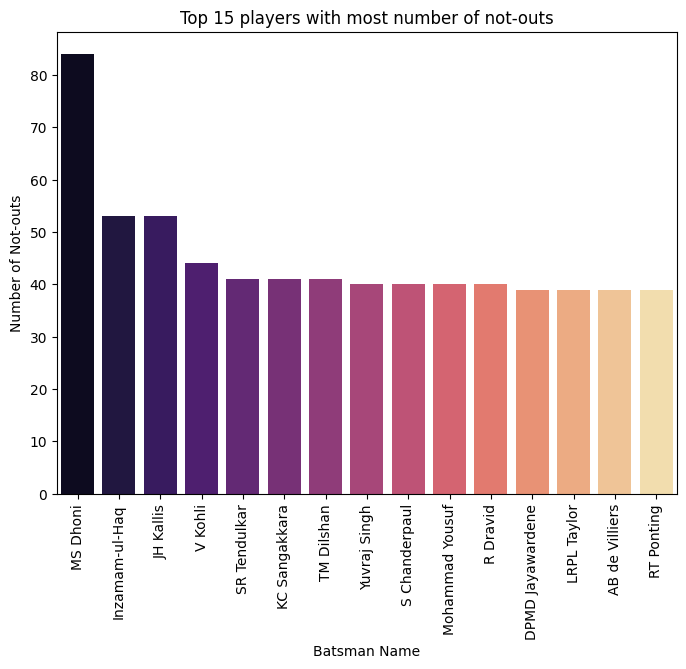

In [79]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='not_outs', data = most_notouts, palette="magma")
plt.title('Top 15 players with most number of not-outs')
plt.xlabel('Batsman Name')
plt.ylabel('Number of Not-outs')
plt.xticks(rotation=90)
plt.show()

In [80]:
df2.head()

,name,span,matches,innings,overs,maiden_overs,runs_conceded,wickets,best_bowling_figure,average,economy_rate,bowling_strike_rate,four_wickets_haul,five_wickets_haul,country
0,M Muralidaran,1993-2011,350,341,3135.1,198,12326,534,7/30,23.08,3.93,35.2,15,10,SL
1,Waqar Younis,1990-2003,250,247,2039.2,134,9608,404,7/36,23.78,4.71,30.2,14,13,PAK
2,WPUJC Vaas,1994-2008,322,320,2629.1,279,11014,400,8/19,27.53,4.18,39.4,9,4,SL
3,Shahid Afridi,1996-2015,398,372,2945.0,76,13632,395,7/12,34.51,4.62,44.7,4,9,PAK
4,SM Pollock,1996-2008,303,297,2618.4,313,9631,393,6/35,24.50,3.67,39.9,12,5,SA


In [81]:
# Top 15 bowlers with most number of maiden overs
most_maiden = df2.sort_values(by='maiden_overs',ascending=False).head(15)

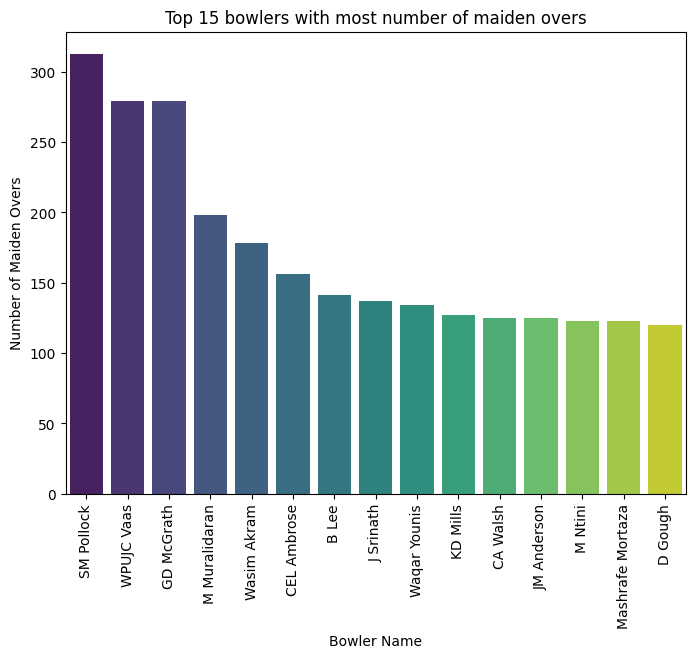

In [82]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='maiden_overs', data = most_maiden, palette="viridis")
plt.title('Top 15 bowlers with most number of maiden overs')
plt.xlabel('Bowler Name')
plt.ylabel('Number of Maiden Overs')
plt.xticks(rotation=90)
plt.show()

In [83]:
# Top 20 bowlers with most number of wickets
most_wicket = df2.sort_values(by='wickets',ascending=False).head(20)

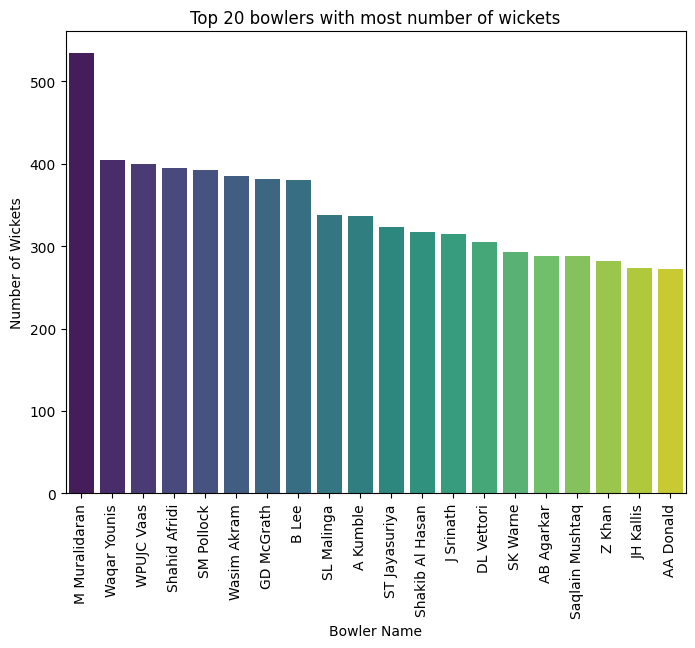

In [84]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='wickets', data = most_wicket, palette="viridis")
plt.title('Top 20 bowlers with most number of wickets')
plt.xlabel('Bowler Name')
plt.ylabel('Number of Wickets')
plt.xticks(rotation=90)
plt.show()

In [85]:
# Top 10 bowlers with most number of runs conceded
most_runs_conc = df2.sort_values(by='runs_conceded',ascending=False).head(10)

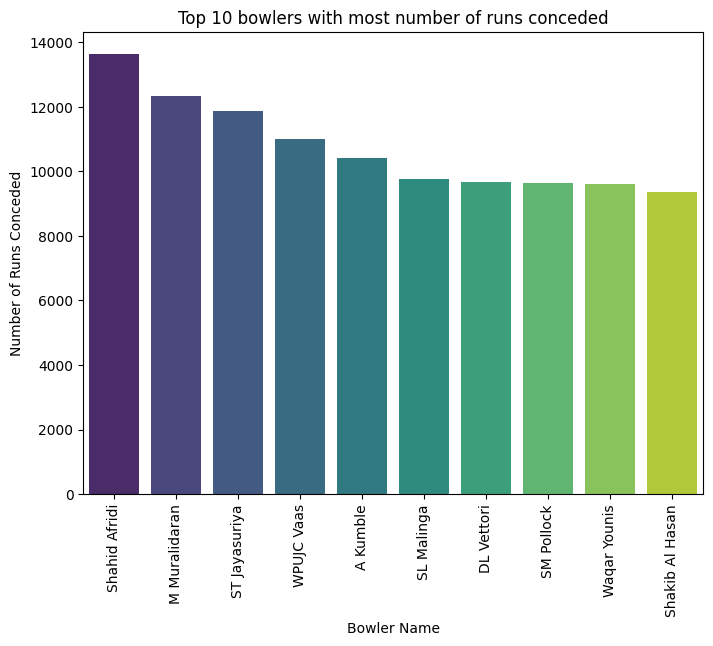

In [86]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='runs_conceded', data = most_runs_conc, palette="viridis")
plt.title('Top 10 bowlers with most number of runs conceded')
plt.xlabel('Bowler Name')
plt.ylabel('Number of Runs Conceded')
plt.xticks(rotation=90)
plt.show()

In [87]:
# Top 10 bowlers with the best economy having played more than 200 matches
best_eco = df2[df2['overs']>2000].sort_values(by='economy_rate',ascending=True).head(10)

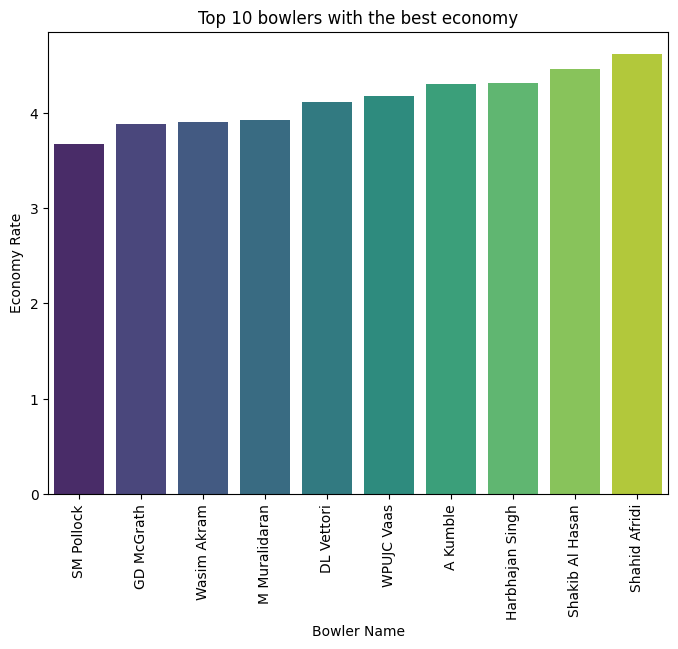

In [88]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='economy_rate', data = best_eco, palette="viridis")
plt.title('Top 10 bowlers with the best economy')
plt.xlabel('Bowler Name')
plt.ylabel('Economy Rate')
plt.xticks(rotation=90)
plt.show()

In [89]:
# Top 10 bowlers with the best bowling average having played more than 200 matches
best_aver = df2[df2['overs']>2000].sort_values(by='average',ascending=True).head(20)

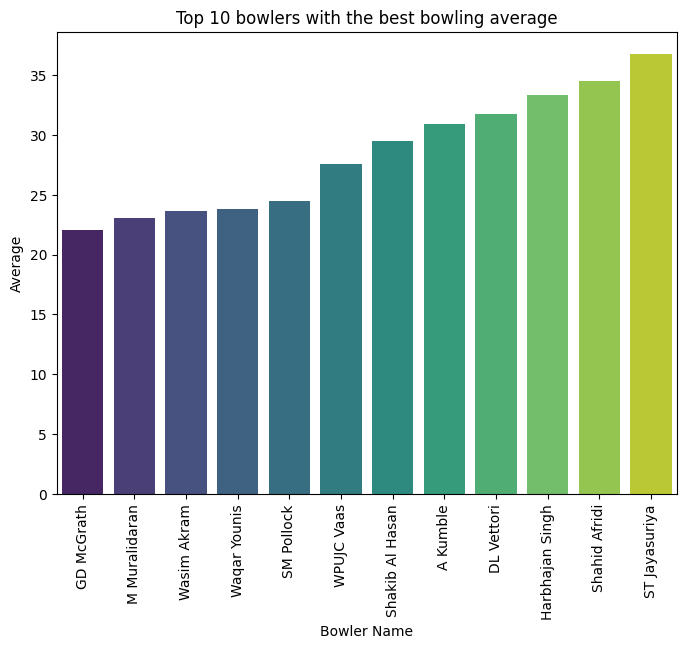

In [90]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='average', data = best_aver, palette="viridis")
plt.title('Top 10 bowlers with the best bowling average')
plt.xlabel('Bowler Name')
plt.ylabel('Average')
plt.xticks(rotation=90)
plt.show()

In [91]:
# Top 10 bowlers with most number of five wicket haul
best_haul = df2.sort_values(by='five_wickets_haul',ascending=False).head(10)

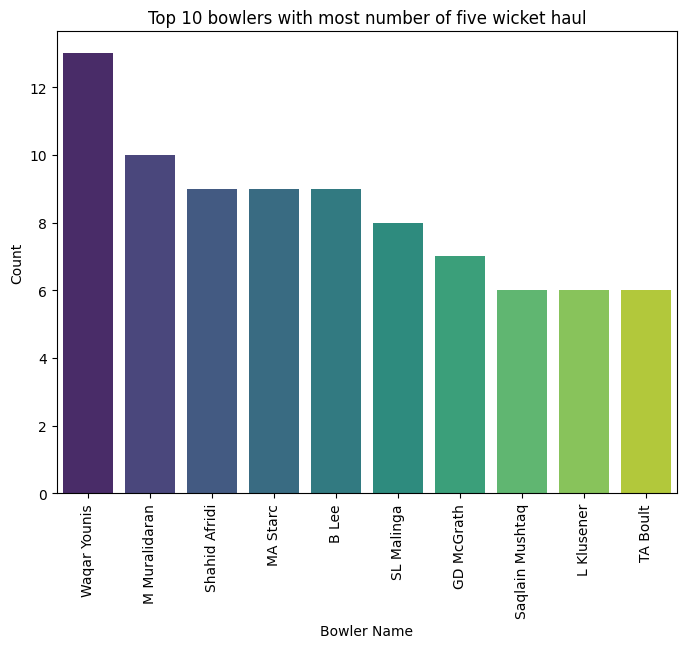

In [92]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='five_wickets_haul', data = best_haul, palette="viridis")
plt.title('Top 10 bowlers with most number of five wicket haul')
plt.xlabel('Bowler Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [93]:
# Top 10 bowlers with most number of five wicket haul
best_h = df2.sort_values(by='four_wickets_haul',ascending=False).head(10)

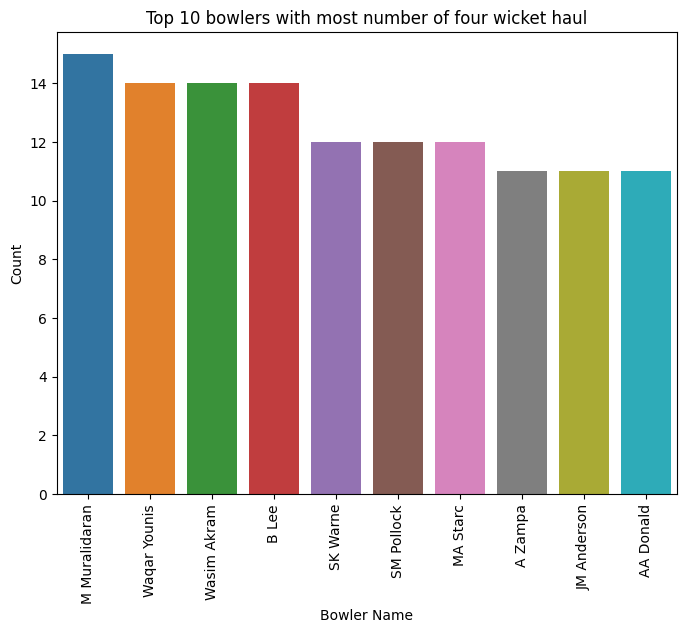

In [94]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='four_wickets_haul', data = best_h)
plt.title('Top 10 bowlers with most number of four wicket haul')
plt.xlabel('Bowler Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [95]:
# all round performance track
merge_df = pd.merge(df, df2, on='name', how='inner')

In [96]:
all_round = merge_df[(merge_df['runs']>8000) & (merge_df['wickets']>150)]

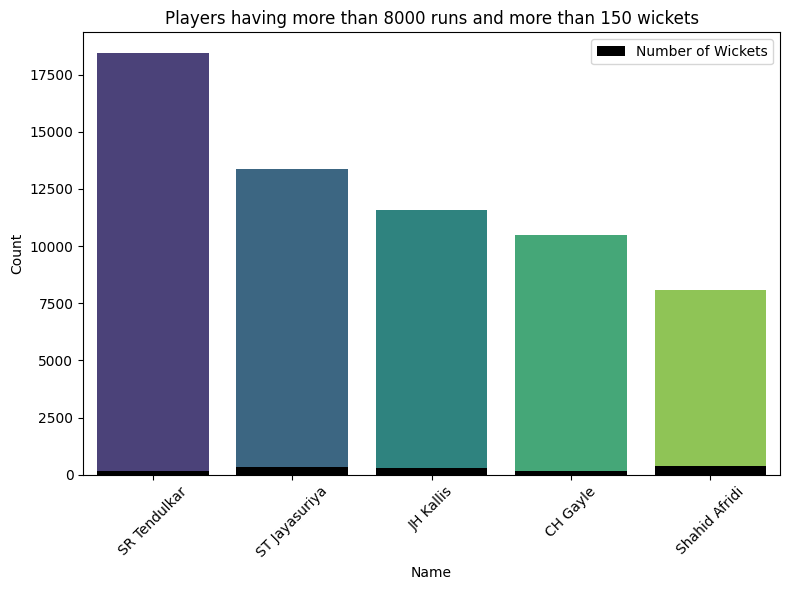

In [97]:
# Visualization plot
fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure and single subplot

# Plot the first bar chart
sns.barplot(x='name', y="runs", data=all_round, ax=ax , palette="viridis")

# Plot the second bar chart on the same subplot with slight right shift
sns.barplot(x="name", y="wickets", data=all_round, ax=ax, label="Number of Wickets", color='black')  # Adjust color as desired

# Adjust x-axis labels to avoid overlapping bars
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add labels and title
plt.xlabel("Name")
plt.ylabel("Count")
plt.title("Players having more than 8000 runs and more than 150 wickets")
plt.legend()  # Show legend for clarity
plt.tight_layout()  # Adjust spacing for readability

plt.show()